In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
file = pd.read_csv('ds_salaries.csv')

In [63]:
file.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Junior/Middle,Full-time,Data Scientist,70000,EUR,79833,Germany,No remote work,Germany,Large
1,2020,Intermediate/Senior,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,No remote work,Japan,Small
2,2020,Intermediate/Senior,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom (Great Britain),Partially remote,United Kingdom (Great Britain),Medium
3,2020,Junior/Middle,Full-time,Product Data Analyst,20000,USD,20000,Honduras,No remote work,Honduras,Small
4,2020,Intermediate/Senior,Full-time,Machine Learning Engineer,150000,USD,150000,United States of America,Partially remote,United States of America,Large


In [64]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  605 non-null    object
 8   remote_ratio        607 non-null    object
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(3), object(8)
memory usage: 52.3+ KB


<BarContainer object of 607 artists>

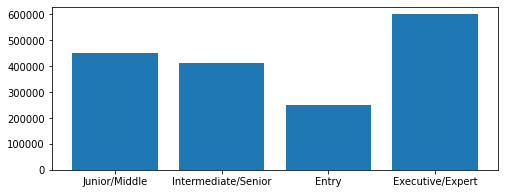

In [65]:
plt.figure(figsize=(8, 3))
plt.bar('experience_level', 'salary_in_usd', data=file)

In [61]:
file.drop(['Unnamed: 0'], inplace=True, axis=1)

In [62]:
file.experience_level.replace(['EN', 'MI', 'EX', 'SE'], 
                              ['Entry', 
                                'Junior/Middle',
                                'Executive/Expert',
                                'Intermediate/Senior'], inplace=True)

file.remote_ratio.replace([0, 50, 100], 
                          ['No remote work', 'Partially remote', 'Fully remote'],
                         inplace=True)

d_size = {'S': 'Small',
         'M': 'Medium',
         'L': 'Large'}

file.company_size = file['company_size'].map(d_size)

d_type = {'PT': 'Part-time', 'FT': 'Full-time', 'CT': 'Contract', 
          'FL': 'Freelance'}
file['employment_type'] = file['employment_type'].map(d_type)

d_ISO3166 = {
	'AD': 'Andorra',
	'AE': 'United Arab Emirates',
	'AF': 'Afghanistan',
	'AG': 'Antigua & Barbuda',
	'AI': 'Anguilla',
	'AL': 'Albania',
	'AM': 'Armenia',
	'AN': 'Netherlands Antilles',
	'AO': 'Angola',
	'AQ': 'Antarctica',
	'AR': 'Argentina',
	'AS': 'American Samoa',
	'AT': 'Austria',
	'AU': 'Australia',
	'AW': 'Aruba',
	'AZ': 'Azerbaijan',
	'BA': 'Bosnia and Herzegovina',
	'BB': 'Barbados',
	'BD': 'Bangladesh',
	'BE': 'Belgium',
	'BF': 'Burkina Faso',
	'BG': 'Bulgaria',
	'BH': 'Bahrain',
	'BI': 'Burundi',
	'BJ': 'Benin',
	'BM': 'Bermuda',
	'BN': 'Brunei Darussalam',
	'BO': 'Bolivia',
	'BR': 'Brazil',
	'BS': 'Bahama',
	'BT': 'Bhutan',
	'BU': 'Burma (no longer exists)',
	'BV': 'Bouvet Island',
	'BW': 'Botswana',
	'BY': 'Belarus',
	'BZ': 'Belize',
	'CA': 'Canada',
	'CC': 'Cocos (Keeling) Islands',
	'CF': 'Central African Republic',
	'CG': 'Congo',
	'CH': 'Switzerland',
	'CI': 'Côte D\'ivoire (Ivory Coast)',
	'CK': 'Cook Iislands',
	'CL': 'Chile',
	'CM': 'Cameroon',
	'CN': 'China',
	'CO': 'Colombia',
	'CR': 'Costa Rica',
	'CS': 'Czechoslovakia (no longer exists)',
	'CU': 'Cuba',
	'CV': 'Cape Verde',
	'CX': 'Christmas Island',
	'CY': 'Cyprus',
	'CZ': 'Czech Republic',
	'DD': 'German Democratic Republic (no longer exists)',
	'DE': 'Germany',
	'DJ': 'Djibouti',
	'DK': 'Denmark',
	'DM': 'Dominica',
	'DO': 'Dominican Republic',
	'DZ': 'Algeria',
	'EC': 'Ecuador',
	'EE': 'Estonia',
	'EG': 'Egypt',
	'EH': 'Western Sahara',
	'ER': 'Eritrea',
	'ES': 'Spain',
	'ET': 'Ethiopia',
	'FI': 'Finland',
	'FJ': 'Fiji',
	'FK': 'Falkland Islands (Malvinas)',
	'FM': 'Micronesia',
	'FO': 'Faroe Islands',
	'FR': 'France',
	'FX': 'France, Metropolitan',
	'GA': 'Gabon',
	'GB': 'United Kingdom (Great Britain)',
	'GD': 'Grenada',
	'GE': 'Georgia',
	'GF': 'French Guiana',
	'GH': 'Ghana',
	'GI': 'Gibraltar',
	'GL': 'Greenland',
	'GM': 'Gambia',
	'GN': 'Guinea',
	'GP': 'Guadeloupe',
	'GQ': 'Equatorial Guinea',
	'GR': 'Greece',
	'GS': 'South Georgia and the South Sandwich Islands',
	'GT': 'Guatemala',
	'GU': 'Guam',
	'GW': 'Guinea-Bissau',
	'GY': 'Guyana',
	'HK': 'Hong Kong',
	'HM': 'Heard & McDonald Islands',
	'HN': 'Honduras',
	'HR': 'Croatia',
	'HT': 'Haiti',
	'HU': 'Hungary',
	'ID': 'Indonesia',
	'IE': 'Ireland',
	'IL': 'Israel',
	'IN': 'India',
	'IO': 'British Indian Ocean Territory',
	'IQ': 'Iraq',
	'IR': 'Islamic Republic of Iran',
	'IS': 'Iceland',
	'IT': 'Italy',
	'JM': 'Jamaica',
	'JO': 'Jordan',
	'JP': 'Japan',
	'KE': 'Kenya',
	'KG': 'Kyrgyzstan',
	'KH': 'Cambodia',
	'KI': 'Kiribati',
	'KM': 'Comoros',
	'KN': 'St. Kitts and Nevis',
	'KP': 'Korea, Democratic People\'s Republic of',
	'KR': 'Korea, Republic of',
	'KW': 'Kuwait',
	'KY': 'Cayman Islands',
	'KZ': 'Kazakhstan',
	'LA': 'Lao People\'s Democratic Republic',
	'LB': 'Lebanon',
	'LC': 'Saint Lucia',
	'LI': 'Liechtenstein',
	'LK': 'Sri Lanka',
	'LR': 'Liberia',
	'LS': 'Lesotho',
	'LT': 'Lithuania',
	'LU': 'Luxembourg',
	'LV': 'Latvia',
	'LY': 'Libyan Arab Jamahiriya',
	'MA': 'Morocco',
	'MC': 'Monaco',
	'MD': 'Moldova, Republic of',
	'MG': 'Madagascar',
	'MH': 'Marshall Islands',
	'ML': 'Mali',
	'MN': 'Mongolia',
	'MM': 'Myanmar',
	'MO': 'Macau',
	'MP': 'Northern Mariana Islands',
	'MQ': 'Martinique',
	'MR': 'Mauritania',
	'MS': 'Monserrat',
	'MT': 'Malta',
	'MU': 'Mauritius',
	'MV': 'Maldives',
	'MW': 'Malawi',
	'MX': 'Mexico',
	'MY': 'Malaysia',
	'MZ': 'Mozambique',
	'NA': 'Namibia',
	'NC': 'New Caledonia',
	'NE': 'Niger',
	'NF': 'Norfolk Island',
	'NG': 'Nigeria',
	'NI': 'Nicaragua',
	'NL': 'Netherlands',
	'NO': 'Norway',
	'NP': 'Nepal',
	'NR': 'Nauru',
	'NT': 'Neutral Zone (no longer exists)',
	'NU': 'Niue',
	'NZ': 'New Zealand',
	'OM': 'Oman',
	'PA': 'Panama',
	'PE': 'Peru',
	'PF': 'French Polynesia',
	'PG': 'Papua New Guinea',
	'PH': 'Philippines',
	'PK': 'Pakistan',
	'PL': 'Poland',
	'PM': 'St. Pierre & Miquelon',
	'PN': 'Pitcairn',
	'PR': 'Puerto Rico',
	'PT': 'Portugal',
	'PW': 'Palau',
	'PY': 'Paraguay',
	'QA': 'Qatar',
	'RE': 'Réunion',
	'RO': 'Romania',
	'RU': 'Russian Federation',
	'RW': 'Rwanda',
	'SA': 'Saudi Arabia',
	'SB': 'Solomon Islands',
	'SC': 'Seychelles',
	'SD': 'Sudan',
	'SE': 'Sweden',
	'SG': 'Singapore',
	'SH': 'St. Helena',
	'SI': 'Slovenia',
	'SJ': 'Svalbard & Jan Mayen Islands',
	'SK': 'Slovakia',
	'SL': 'Sierra Leone',
	'SM': 'San Marino',
	'SN': 'Senegal',
	'SO': 'Somalia',
	'SR': 'Suriname',
	'ST': 'Sao Tome & Principe',
	'SU': 'Union of Soviet Socialist Republics (no longer exists)',
	'SV': 'El Salvador',
	'SY': 'Syrian Arab Republic',
	'SZ': 'Swaziland',
	'TC': 'Turks & Caicos Islands',
	'TD': 'Chad',
	'TF': 'French Southern Territories',
	'TG': 'Togo',
	'TH': 'Thailand',
	'TJ': 'Tajikistan',
	'TK': 'Tokelau',
	'TM': 'Turkmenistan',
	'TN': 'Tunisia',
	'TO': 'Tonga',
	'TP': 'East Timor',
	'TR': 'Turkey',
	'TT': 'Trinidad & Tobago',
	'TV': 'Tuvalu',
	'TW': 'Taiwan, Province of China',
	'TZ': 'Tanzania, United Republic of',
	'UA': 'Ukraine',
	'UG': 'Uganda',
	'UM': 'United States Minor Outlying Islands',
	'US': 'United States of America',
	'UY': 'Uruguay',
	'UZ': 'Uzbekistan',
	'VA': 'Vatican City State (Holy See)',
	'VC': 'St. Vincent & the Grenadines',
	'VE': 'Venezuela',
	'VG': 'British Virgin Islands',
	'VI': 'United States Virgin Islands',
	'VN': 'Viet Nam',
	'VU': 'Vanuatu',
	'WF': 'Wallis & Futuna Islands',
	'WS': 'Samoa',
	'YD': 'Democratic Yemen (no longer exists)',
	'YE': 'Yemen',
	'YT': 'Mayotte',
	'YU': 'Yugoslavia',
	'ZA': 'South Africa',
	'ZM': 'Zambia',
	'ZR': 'Zaire',
	'ZW': 'Zimbabwe',
	'ZZ': 'Unknown or unspecified country',
}

file.company_location = file['company_location'].map(d_ISO3166)
file.employee_residence = file['employee_residence'].map(d_ISO3166)

In [66]:
file

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Junior/Middle,Full-time,Data Scientist,70000,EUR,79833,Germany,No remote work,Germany,Large
1,2020,Intermediate/Senior,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,No remote work,Japan,Small
2,2020,Intermediate/Senior,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom (Great Britain),Partially remote,United Kingdom (Great Britain),Medium
3,2020,Junior/Middle,Full-time,Product Data Analyst,20000,USD,20000,Honduras,No remote work,Honduras,Small
4,2020,Intermediate/Senior,Full-time,Machine Learning Engineer,150000,USD,150000,United States of America,Partially remote,United States of America,Large
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Intermediate/Senior,Full-time,Data Engineer,154000,USD,154000,United States of America,Fully remote,United States of America,Medium
603,2022,Intermediate/Senior,Full-time,Data Engineer,126000,USD,126000,United States of America,Fully remote,United States of America,Medium
604,2022,Intermediate/Senior,Full-time,Data Analyst,129000,USD,129000,United States of America,No remote work,United States of America,Medium
605,2022,Intermediate/Senior,Full-time,Data Analyst,150000,USD,150000,United States of America,Fully remote,United States of America,Medium


In [68]:
file.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

In [69]:
file.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [70]:
file.describe()

,work_year,salary,salary_in_usd
count,607.000000,6.070000e+02,607.000000
mean,2021.405272,3.240001e+05,112297.869852
std,0.692133,1.544357e+06,70957.259411
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,7.000000e+04,62726.000000
50%,2022.000000,1.150000e+05,101570.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


In [71]:
file.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    2
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [72]:
file.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     55
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [73]:
file.corr()

,work_year,salary,salary_in_usd
work_year,1.000000,-0.087577,0.170493
salary,-0.087577,1.000000,-0.083906
salary_in_usd,0.170493,-0.083906,1.000000


Text(0.5, 1.0, 'Confusion Matrix')

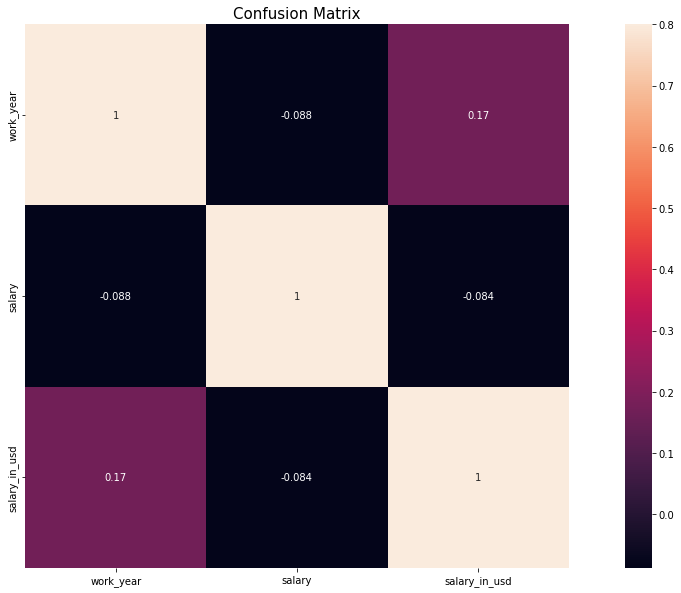

In [75]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(file.corr(), vmax = 0.8, square=True, annot=True)
plt.title('Confusion Matrix', fontsize=15)

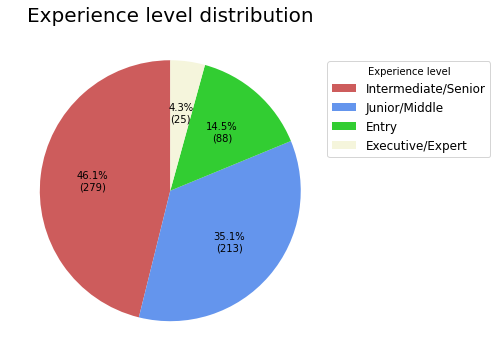

In [90]:
level_counts = file.experience_level.value_counts()

plt.figure(figsize=(12, 6))
plt.title('Experience level distribution', size=20)

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return f'{round(pct,1)}%\n({absolute})'

plt.pie(level_counts,
       autopct=lambda pct: func(pct, level_counts), 
       startangle=90,
       colors = ("indianred","cornflowerblue","limegreen","beige"))

plt.legend(loc='center right',
          labels = level_counts.index,
          bbox_to_anchor = (1, 0, 0.5, 1.5),
          title='Experience level',
          fontsize=12)